In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

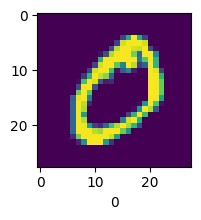

In [12]:
plot_sample(x_train,y_train,1)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_test.shape

(10000, 28, 28)

In [20]:
## Upon seeing the shape we get to know that this is a grey scale image
cnn = models.Sequential([
    layers.Conv2D(filters=30, padding='same',kernel_size=(3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=15, padding='same', kernel_size=(3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')              
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
 412/1875 [=====>........................] - ETA: 10s - loss: 0.0166 - accuracy: 0.9944

In [22]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9889


[0.03536688908934593, 0.9889000058174133]

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)